In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


## Завантаження та дослідження датасету

Завантаження набору у датафрейм Pandas та дослідження його характеристик

In [2]:
# https://www.kaggle.com/datasets/mohidabdulrehman/ultimate-car-price-prediction-dataset
df = pd.read_csv('car_prices.csv')

# видалення першої колонки
df = df.drop(df.columns[0], axis=1)

# Показ перших 5 рядків
df.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


In [3]:
# Статистика даних (кількість, середнє, стандартне відхилення, мінімальне та максимальне значення)
df.describe()

,Price,Model Year,Mileage,Engine Capacity
count,4.602200e+04,46022.000000,46022.000000,46022.000000
mean,2.014153e+06,2011.035374,90965.128243,1313.115575
std,2.939071e+06,6.399403,63656.656034,614.690832
min,1.110000e+05,1990.000000,1.000000,16.000000
25%,8.500000e+05,2007.000000,48899.500000,1000.000000
50%,1.450000e+06,2013.000000,80000.000000,1300.000000
75%,2.300000e+06,2016.000000,120000.000000,1500.000000
max,7.750000e+07,2019.000000,999999.000000,6600.000000


In [4]:
# Кількітьсть унікальних значень в кожному стовпці
df.nunique()

Company Name             31
Model Name              196
Price                  1419
Model Year               30
Location                  6
Mileage                5573
Engine Type               3
Engine Capacity          75
Color                    24
Assembly                  2
Body Type                 6
Transmission Type         2
Registration Status       2
dtype: int64

In [5]:
for c in df.columns:
    print(c + ': ', sorted(df[c].unique()))

Company Name:  ['Adam', 'Audi', 'BMW', 'Chery', 'Chevrolet', 'DFSK', 'Daewoo', 'Daihatsu', 'FAW', 'Fiat', 'Honda', 'Hummer', 'Hyundai', 'Jaguar', 'Jeep', 'KIA', 'Land', 'Lexus', 'MINI', 'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Porsche', 'Range', 'SsangYong', 'Subaru', 'Suzuki', 'Toyota', 'United', 'Volvo']
Model Name:  ['3', '5', '7', 'A3', 'A4', 'A5', 'A6', 'A7', 'APV', 'Accord', 'Acty', 'Allion', 'Alphard', 'Altezza', 'Alto', 'Aqua', 'Auris', 'Avanza', 'Aveo', 'Axela', 'Aygo', 'Azwagon', 'B', 'Baleno', 'Bego', 'Belta', 'Benz', 'Blue', 'Bluebird', 'Bolan', 'Boon', 'Bravo', 'C-HR', 'C37', 'CJ', 'CR-V', 'CT200h', 'Caldina', 'Cami', 'Camry', 'Carol', 'Cast', 'Cayenne', 'Cefiro', 'Celerio', 'Cervo', 'Charade', 'Ciaz', 'City', 'Civic', 'Clipper', 'Convoy', 'Cooper', 'Corolla', 'Corona', 'Coupe', 'Cross', 'Crown', 'Cultus', 'Cuore', 'Dayz', 'Dias', 'Duet', 'EK', 'Ek', 'Esse', 'Estima', 'Excel', 'Exclusive', 'FX', 'Familia', 'Fit', 'Flair', 'Fortuner', 'Freed', 'Galant', 'Glory', 'Grace

In [6]:
# список брендів з відповідними моделями до кожного бренду
brands = df['Company Name'].unique()
models = []
for brand in brands:
    models.append(df[df['Company Name'] == brand]['Model Name'].unique())

for i in range(len(brands)):
    print(brands[i] + ': ', models[i])



Toyota:  ['Vitz' 'Corolla' 'Prado' 'Fortuner' 'Prius' 'Passo' 'Belta' 'Camry'
 'Noah' 'Land' 'Aqua' 'Probox' 'C-HR' 'Voxy' 'Mark' 'Platz' 'Premio'
 'Surf' 'Crown' 'Aygo' 'Allion' 'Pixis' 'Porte' 'ISIS' 'Rush' 'Sienta'
 'Corona' 'Hilux' 'Estima' 'Rav4' 'Hiace' 'Caldina' 'Starlet' 'IST' 'Duet'
 'Wish' 'B' 'Succeed' 'Auris' 'iQ' 'Vanguard' 'Cami' 'Avanza' 'Alphard'
 'Rumion' 'Altezza' 'Ractis']
Suzuki:  ['Alto' 'Wagon' 'Cultus' 'Mehran' 'Khyber' 'Bolan' 'Swift' 'Liana'
 'Margalla' 'MR' 'Baleno' 'Kizashi' 'Ciaz' 'Hustler' 'Jimny' 'Kei'
 'Celerio' 'Potohar' 'Vitara' 'APV' 'FX' 'Splash' 'Solio' 'Cervo' 'Sx4'
 'Palette']
Honda:  ['Civic' 'Vezel' 'City' 'N' 'Fit' 'Accord' 'Grace' 'Vamos' 'Life' 'Cross'
 'Freed' 'Insight' 'HR-V' 'Stream' 'CR-V' 'Acty' 'Zest' 'Thats']
Mitsubishi:  ['Mirage' 'Lancer' 'Ek' 'EK' 'Pajero' 'Galant' 'Outlander' 'I' 'Minica'
 'L300']
Nissan:  ['Dayz' 'Juke' 'Clipper' 'Moco' 'Sunny' 'Otti' 'Note' 'Tiida' 'March' 'X'
 'Bluebird' 'Roox' 'Patrol' 'Pino' 'Terrano' 'Blue' 'L

In [7]:
# Перевірка на пропущені значення
df.isna().sum()

Company Name           0
Model Name             0
Price                  0
Model Year             0
Location               0
Mileage                0
Engine Type            0
Engine Capacity        0
Color                  0
Assembly               0
Body Type              0
Transmission Type      0
Registration Status    0
dtype: int64

In [8]:
# Типи даних в кожному стовпці
df.dtypes

Company Name           object
Model Name             object
Price                   int64
Model Year              int64
Location               object
Mileage                 int64
Engine Type            object
Engine Capacity         int64
Color                  object
Assembly               object
Body Type              object
Transmission Type      object
Registration Status    object
dtype: object

## Препроцессинг даних

### Робота з пропущеними значеннями

Видаленя тих записів, у яких є відсутні значення

In [9]:
df.dropna(inplace=True)

In [10]:
# перейменування стовпців

df = df.rename(columns={
    'Company Name': 'car_make',
    'Model Name': 'car_model',
    'Model Year': 'car_year',
    'Mileage': 'mileage',
    'Color': 'color',
    'Engine Type': 'engine_type',
    'Engine Capacity': 'engine_displacement',
    'Transmission Type': 'transmission_type',
    'Price': 'price',
})

In [11]:
# Конвертування ціни з рупій в долари
df['price'] = df['price'] * 0.013

In [12]:
df.head()

,car_make,car_model,price,car_year,Location,mileage,engine_type,engine_displacement,color,Assembly,Body Type,transmission_type,Registration Status
0,Toyota,Vitz,31005.0,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,1443.0,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,19890.0,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,Suzuki,Alto,21450.0,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,Toyota,Corolla,18655.0,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


### Кодування категоріальних значень

Конвертування категоріальних значень у числові. За допомогою One Hot Encoding

In [13]:
categorical_features  = ['car_make', 'car_model', 'color', 'engine_type', 'transmission_type']
numerical_features = ['car_year', 'engine_displacement']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

### Розбиття даних

Розділення датасету на навчальну і тестові вибірки.

In [14]:
X = df[[
    'car_make',
    'car_model',
    'car_year',
    'mileage',
    'color',
    'engine_type',
    'engine_displacement',
    'transmission_type',
]]

y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100)

In [15]:
X

,car_make,car_model,car_year,mileage,color,engine_type,engine_displacement,transmission_type
0,Toyota,Vitz,2017,9869,Silver,Petrol,1000,Automatic
1,Toyota,Corolla,2019,11111,White,Petrol,1300,Automatic
2,Suzuki,Alto,2019,17500,White,Petrol,660,Automatic
3,Suzuki,Alto,2019,9600,White,Petrol,660,Manual
4,Toyota,Corolla,2010,120000,Black,Petrol,1300,Manual
...,...,...,...,...,...,...,...,...
46017,Honda,Vezel,2015,32000,Black,Petrol,1500,Automatic
46018,Toyota,Aqua,2015,52000,Blue,Petrol,1500,Automatic
46019,Honda,Civic,2015,125000,Black,Petrol,1800,Automatic
46020,Toyota,Aqua,2016,60000,Black,Petrol,1500,Automatic


## Тренування моделей

Конвеєри для різних моделей. Випробовування моделей Linear Regression, Decision Tree, Random Forest, та K-Nearest Neighbors

In [16]:
# Linear Regression

lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

print(f"Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")
print(f"Linear Regression R^2: {r2_score(y_test, y_pred_lr)}")


Linear Regression RMSE: 20839.87951445469
Linear Regression R^2: 0.7174848568790486


In [17]:
#  Decision Tree

dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', DecisionTreeRegressor())])

dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)

print(f"Decision Tree RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt))}")
print(f"Decision Tree R^2: {r2_score(y_test, y_pred_dt)}")


Decision Tree RMSE: 7030.058992654416
Decision Tree R^2: 0.9678508671927364


In [18]:
# Random Forest

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor())])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print(f"Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"Random Forest R^2: {r2_score(y_test, y_pred_rf)}")


Random Forest RMSE: 6830.0705309936
Random Forest R^2: 0.969653982716696


In [19]:
#  K-Nearest Neighbors

knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', KNeighborsRegressor())])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

print(f"KNN RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_knn))}")
print(f"KNN R^2: {r2_score(y_test, y_pred_knn)}")


KNN RMSE: 8156.017563692678
KNN R^2: 0.956727934222976


## Оцінка моделей

Порівняння ефективності за метриками Root Mean Squared Error (RMSE) та R² score.

In [20]:
#####

## Підбір гіперпараметрів

GridSearchCV для пошуку найкращих параметрів для способу із K-Nearest Neighbors

In [25]:
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid,
                           cv=2, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
print(
    f"Optimized Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best))}")
print(f"Optimized Random Forest R^2: {r2_score(y_test, y_pred_best)}")

Fitting 2 folds for each of 24 candidates, totalling 48 fits
Best parameters: {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Optimized Random Forest RMSE: 6764.776996255174
Optimized Random Forest R^2: 0.9702314080654079


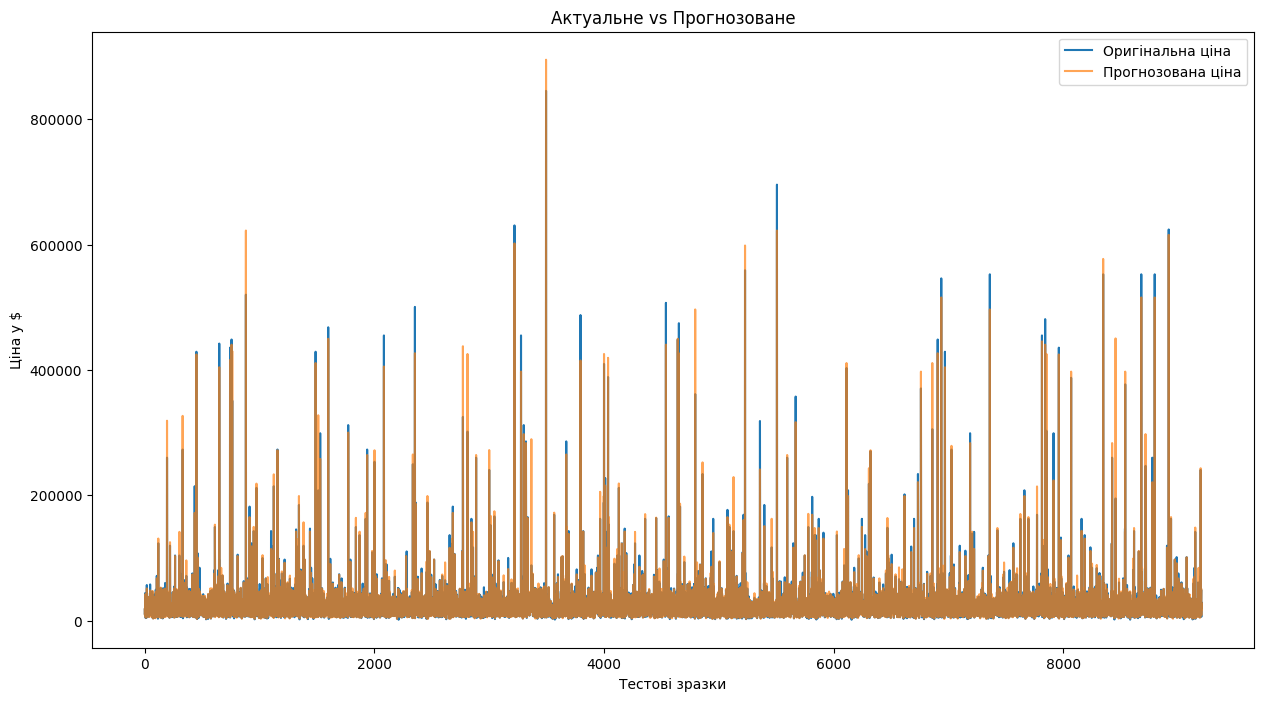

In [28]:
# візуалізація тестових та прогнозованих значень
plt.figure(figsize=(15, 8))

plt.plot(y_test.values, label='Оригінальна ціна ')
plt.plot(y_pred_best, label='Прогнозована ціна', alpha=0.7)
plt.legend()
plt.title('Актуальне vs Прогнозоване')
plt.ylabel('Ціна у $')
plt.xlabel('Тестові зразки')
plt.show()

## Збереження фінальної моделі

In [29]:
import joblib
joblib.dump(best_model, 'car_price_predictor_rf.pkl')

# Перевірка моделі
model = joblib.load('car_price_predictor_rf.pkl')

test_data = {
    "car_make": ["Toyota"],
    "car_model": ["Corolla"],
    "car_year": [2010],
    "mileage": [120000],
    "color": ["Black"],
    "engine_type": ["Petrol"],
    "engine_displacement": [1800],
    "transmission_type": ["Manual"]
}

test_df = pd.DataFrame(test_data)

print(model.predict(test_df))


[20019.3242927]
